<a href="https://colab.research.google.com/github/hstevans/Food-Sales-Predictions/blob/main/Food_Predictions_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
filename = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


#Data Cleaning

In [4]:
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [5]:
df.duplicated().sum()

0

In [6]:
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [7]:
df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.value_counts('Outlet_Establishment_Year')

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
dtype: int64

In [11]:
df['Outlet_Size'].fillna('Missing', inplace=True)

In [12]:
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
df = df.drop(columns=['Item_Identifier'])

In [15]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


#Exploratory Visuals & Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [18]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
df.nunique(axis=0)

Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [20]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


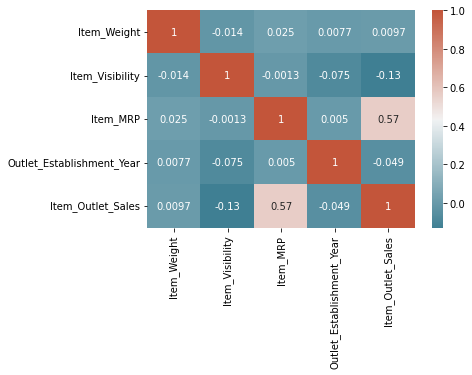

In [21]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));
#There is a moderate positive correlation between Item Outlet Sales and Item MRP. There is a slight negative correlation between Item Outlet Sales and Item Visibility.

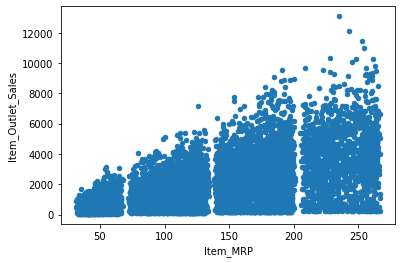

In [22]:
df.plot(kind='scatter', x='Item_MRP', y='Item_Outlet_Sales');
#The higher the list price, the higher the item sales

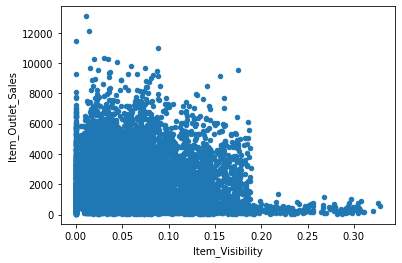

In [28]:
df.plot(kind='scatter', x='Item_Visibility', y='Item_Outlet_Sales');

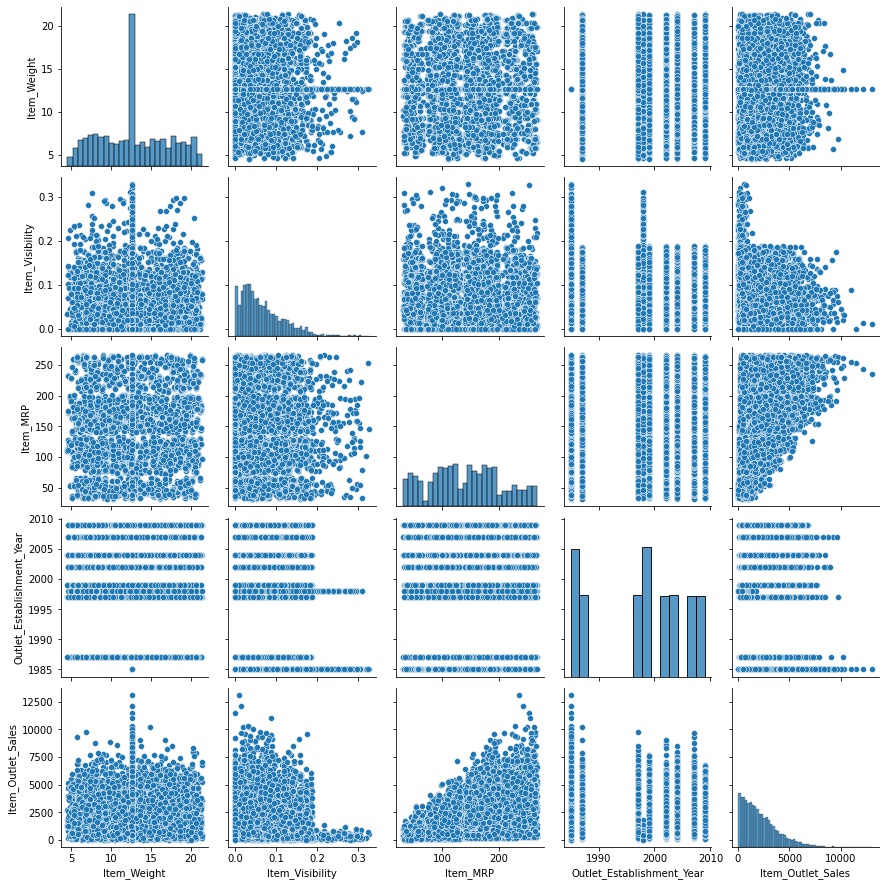

In [23]:
sns.pairplot(df);

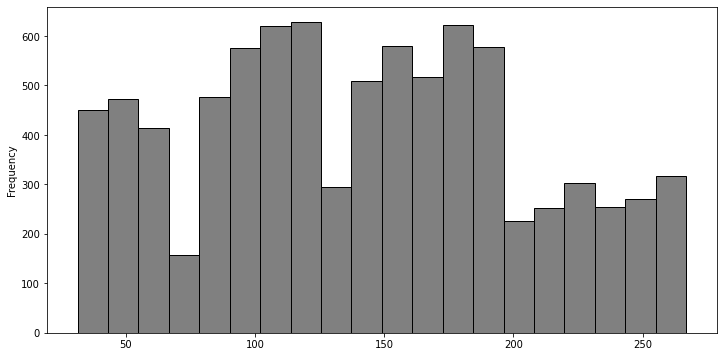

In [24]:
df['Item_MRP'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

In [ ]:
# histogram shows the distribution of Item MRP or suggested retail price.

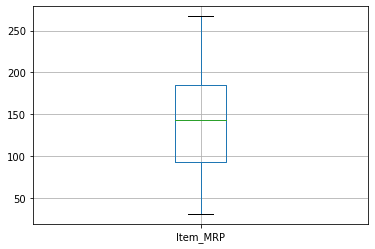

In [32]:
df.boxplot(column='Item_MRP');

In [ ]:
# boxplot shows that the median suggested retail price is around 140.

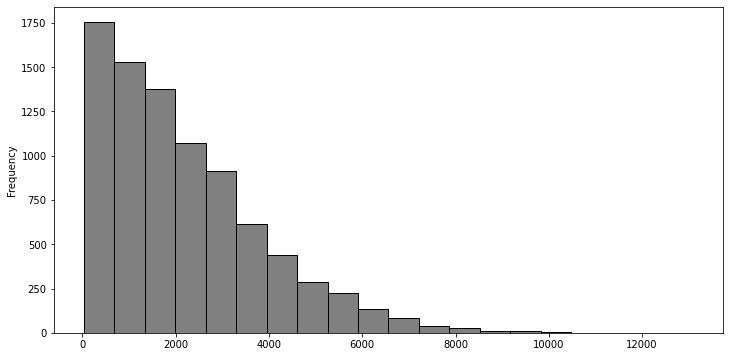

In [25]:
Pdf['Item_Outlet_Sales'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

In [ ]:
# histogram shows the distribution of Item Outlet Sales.

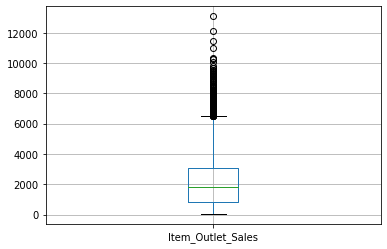

In [33]:
df.boxplot(column='Item_Outlet_Sales');

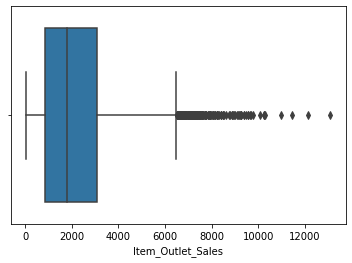

In [39]:
sns.boxplot(data=df, x='Item_Outlet_Sales');

In [ ]:
# boxplots show the median for Item Outlet Sales is around 1900

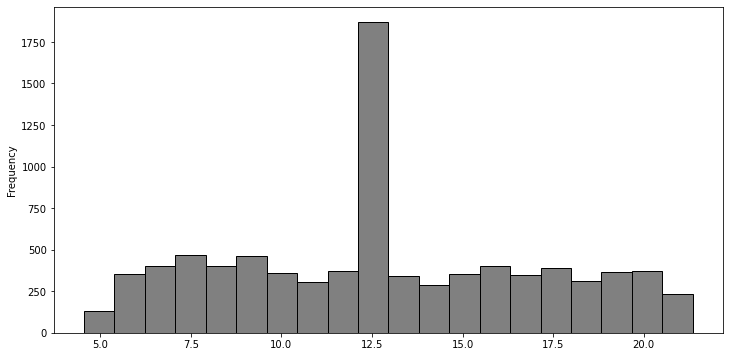

In [26]:
df['Item_Weight'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

In [ ]:
# histogram shows the distribution of Item Weight.

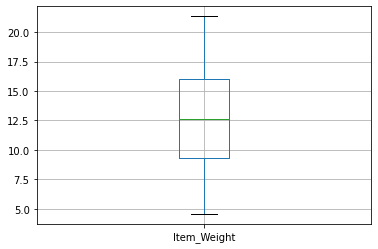

In [34]:
df.boxplot(column='Item_Weight');

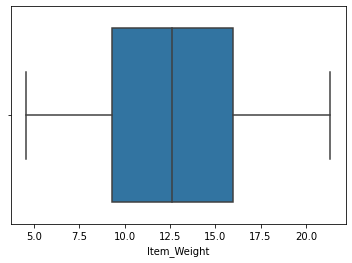

In [40]:
sns.boxplot(data=df, x='Item_Weight');

In [ ]:
# Boxplot shows that the median for Item Weight is about 12.5

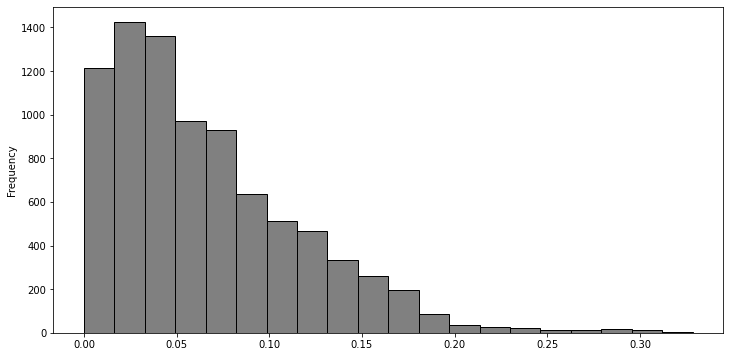

In [30]:
df['Item_Visibility'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

In [ ]:
# histogram shows the distribution of Item Visibility.

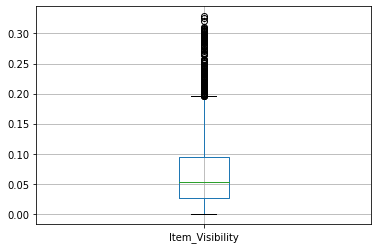

In [37]:
df.boxplot(column='Item_Visibility');

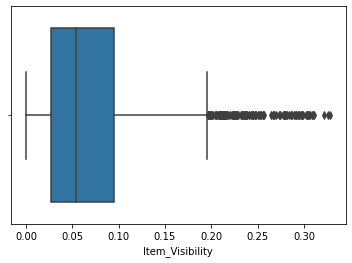

In [38]:
sns.boxplot(data=df, x='Item_Visibility');

In [ ]:
# boxplots show that the median for Item visibility is around .06

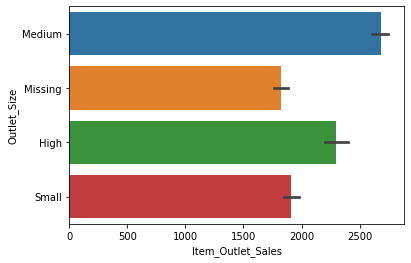

In [41]:
sns.barplot(data=df, y='Outlet_Size', x='Item_Outlet_Sales');

In [ ]:
# Barplot shows that Medium sized outlets make the highest sales

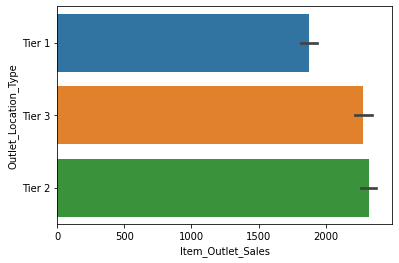

In [42]:
sns.barplot(data=df, y='Outlet_Location_Type', x='Item_Outlet_Sales');

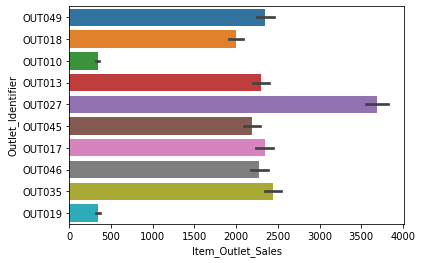

In [43]:
sns.barplot(data=df, y='Outlet_Identifier', x='Item_Outlet_Sales');

In [ ]:
# Barplot shows that store with identifier OUT027 has the highest sales, while store with identifier OUT019 has the lowest

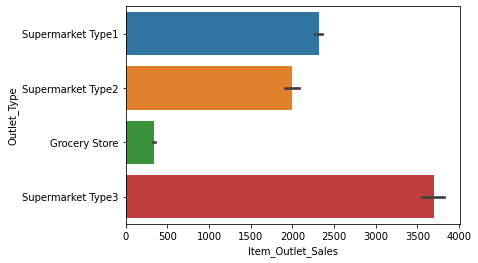

In [44]:
sns.barplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales');

In [ ]:
# Barplot shows that Supermarket Type3 has the highest sales while grocery stores have the lowest sales

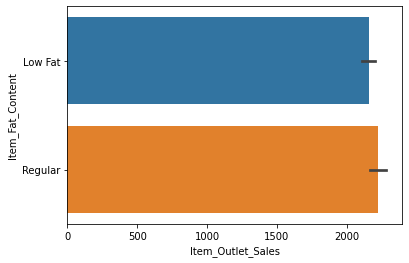

In [45]:
sns.barplot(data=df, y='Item_Fat_Content', x='Item_Outlet_Sales');

In [ ]:
# Barplot shows that items with regular fat and items with low fat sell about equally. This would suggest fat content does not affect item sales